In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
# also import for Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn import metrics


In [2]:
df = pd.read_csv('results_new2.csv')
df

,DataLabel,TP,TE1,TE2,TE3,TE4,Program Number,Batch Status,Min_ster_Temp,Max_ster_Temp,...,Overall Avg TE2,Overall Avg TE3,Overall Avg TE4,Overall Avg TP,Overall Var TE1,Overall Var TE2,Overall Var TE3,Overall Var TE4,Overall Var TP,Time
0,1,2.110000,0.000000,122.100000,122.200000,122.100000,8,FAILED,122.1,122.2,...,114.396238,115.152978,114.968966,1.547931,2803.869759,131.966338,112.167656,115.738436,0.657171,2019-01-09 09:42:00
1,2,2.109180,121.744262,121.963115,122.161475,122.013934,8,OK,121.2,122.2,...,112.804585,113.555301,113.648711,1.100487,874.492528,127.465898,114.342824,109.503023,0.728475,2019-01-09 11:30:00
2,3,2.108934,121.779508,122.040164,122.269672,122.140164,3,OK,121.2,122.4,...,113.893458,114.797819,114.575701,1.074486,925.593441,86.884676,77.099151,81.663595,0.849215,2019-01-09 12:32:00
3,4,2.109024,121.760163,121.968293,122.203252,122.082927,11,OK,121.2,122.3,...,113.450450,114.356156,114.064565,1.073874,967.878284,89.466001,81.164036,86.763680,0.824727,2019-01-09 14:00:00
4,5,2.109754,121.595902,121.831148,122.027869,121.883607,10,OK,121.2,122.1,...,102.759497,102.860056,103.077933,1.959721,879.638523,473.956702,492.689689,450.135114,0.143143,2019-01-09 16:10:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1855,1856,2.109396,122.173077,122.124176,122.273626,122.214835,16,OK,121.7,122.3,...,108.680133,107.888000,108.210667,1.074733,859.354203,127.943356,147.263327,136.874466,0.614175,2021-04-04 13:10:00
1856,1857,0.080000,19.700000,19.700000,19.800000,19.800000,1,Maintenance,121.7,122.3,...,20.772038,20.595261,20.683649,0.169668,0.319382,0.142024,0.496739,0.319382,0.052477,2021-04-05 11:02:00
1857,1858,2.107097,122.111290,122.088710,122.220968,122.175806,12,OK,121.7,122.3,...,99.751073,98.556652,99.501288,0.953476,1059.513492,397.475785,498.890139,465.689955,0.728262,2021-04-05 12:04:00
1858,1859,2.109396,122.238462,122.128571,122.275824,122.225275,16,OK,121.7,122.3,...,107.934910,107.084685,107.270608,0.972016,639.933958,86.442523,95.712347,90.944130,0.599659,2021-04-05 14:37:00


In [3]:
# print all columns in dataframe
print(df.columns)

Index(['DataLabel', 'TP', 'TE1', 'TE2', 'TE3', 'TE4', 'Program Number',
       'Batch Status', 'Min_ster_Temp', 'Max_ster_Temp', 'Overall Avg TE1',
       'Overall Avg TE2', 'Overall Avg TE3', 'Overall Avg TE4',
       'Overall Avg TP', 'Overall Var TE1', 'Overall Var TE2',
       'Overall Var TE3', 'Overall Var TE4', 'Overall Var TP', 'Time'],
      dtype='object')


In [4]:
# in Batch status check the count of each unique status

df['Batch Status'].value_counts()

OK                   1507
Maintenance           247
FAILED                 83
Emergency Failure      23
Name: Batch Status, dtype: int64

In [5]:
# convert the date time to pandas datetime

df['Time'] = pd.to_datetime(df['Time'])
# drop time column
df.drop('Time', axis=1, inplace=True)


In [6]:
# do label encoding, apply 1 for OK and apply 0 for all others in Batch status, and later delete the batch status column
df['Batch Status_encoded'] = df['Batch Status'].apply(lambda x: 1 if x == 'OK' else 0)

In [7]:
# replace batch status with batch status encoded
df = df.drop(columns=['Batch Status'])
df = df.rename(columns={'Batch Status_encoded': 'Batch Status'})

In [8]:

df.drop('DataLabel',axis=1,inplace=True)

def df_to_vectors(df):
    vectors = []
    for i in range(len(df) - 20):
        vector = df.iloc[i:i+20].values.flatten()
        vectors.append(vector)
    return vectors

vectors = df_to_vectors(df)



In [9]:

vectors = np.array(vectors)
vectors.shape

(1840, 380)

In [10]:
# Output of each batch status
batch_statuses = df['Batch Status'].values[21:]
# append the last row as a 1 
batch_statuses = np.append(batch_statuses, 1)

batch_statuses.shape

(1840,)

In [11]:
df.head()

,TP,TE1,TE2,TE3,TE4,Program Number,Min_ster_Temp,Max_ster_Temp,Overall Avg TE1,Overall Avg TE2,Overall Avg TE3,Overall Avg TE4,Overall Avg TP,Overall Var TE1,Overall Var TE2,Overall Var TE3,Overall Var TE4,Overall Var TP,Batch Status
0,2.110000,0.000000,122.100000,122.200000,122.100000,8,122.1,122.2,47.120690,114.396238,115.152978,114.968966,1.547931,2803.869759,131.966338,112.167656,115.738436,0.657171,0
1,2.109180,121.744262,121.963115,122.161475,122.013934,8,121.2,122.2,92.999427,112.804585,113.555301,113.648711,1.100487,874.492528,127.465898,114.342824,109.503023,0.728475,1
2,2.108934,121.779508,122.040164,122.269672,122.140164,3,121.2,122.4,90.738629,113.893458,114.797819,114.575701,1.074486,925.593441,86.884676,77.099151,81.663595,0.849215,1
3,2.109024,121.760163,121.968293,122.203252,122.082927,11,121.2,122.3,88.138739,113.450450,114.356156,114.064565,1.073874,967.878284,89.466001,81.164036,86.763680,0.824727,1
4,2.109754,121.595902,121.831148,122.027869,121.883607,10,121.2,122.1,92.804469,102.759497,102.860056,103.077933,1.959721,879.638523,473.956702,492.689689,450.135114,0.143143,1


In [12]:
# check batch statuses value counts
df['Batch Status'].value_counts()


1    1507
0     353
Name: Batch Status, dtype: int64

In [13]:
# Convert dataframe to feature vectors and target variable
X = vectors
y = batch_statuses

In [14]:
# Separate the data into failed and passed batches
failed_indices = np.where(y == 0)[0]
passed_indices = np.where(y == 1)[0]
# Split the failed batches into train and test sets
failed_indices_train, failed_indices_test = train_test_split(failed_indices, test_size=0.2)
# do similar split for passed indices
passed_indices_train, passed_indices_test = train_test_split(passed_indices, test_size=0.2)
# combine train and test indices separately, including passed and failed
train_indices = np.concatenate((failed_indices_train, passed_indices_train))
test_indices = np.concatenate((failed_indices_test, passed_indices_test))


# # Combine the indices of train and test sets with passed indices
# train_indices = np.concatenate((failed_indices_train, passed_indices))
# test_indices = np.concatenate((failed_indices_test, passed_indices[:4*len(failed_indices_test)]))

# Shuffle the indices to ensure randomness
np.random.shuffle(train_indices)
np.random.shuffle(test_indices)

# Use the indices to get the corresponding data
X_train, y_train = X[train_indices], y[train_indices]
X_test, y_test = X[test_indices], y[test_indices]


In [68]:
# find shape of X_train and X_test and y_train and y_test
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((1471, 380), (369, 380), (1471,), (369,))

In [69]:


# Convert dataframe to feature vectors and target variable
X = vectors
y = batch_statuses

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = clf.predict(X_test)
y_tt = clf.predict(X_train)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_dt)
print("Accuracy:", accuracy)
# calculate the mean squared error
mse = mean_squared_error(y_test, y_pred_dt)
print("Mean Squared Error:", mse)


Accuracy: 0.7208672086720868
Mean Squared Error: 0.2791327913279133


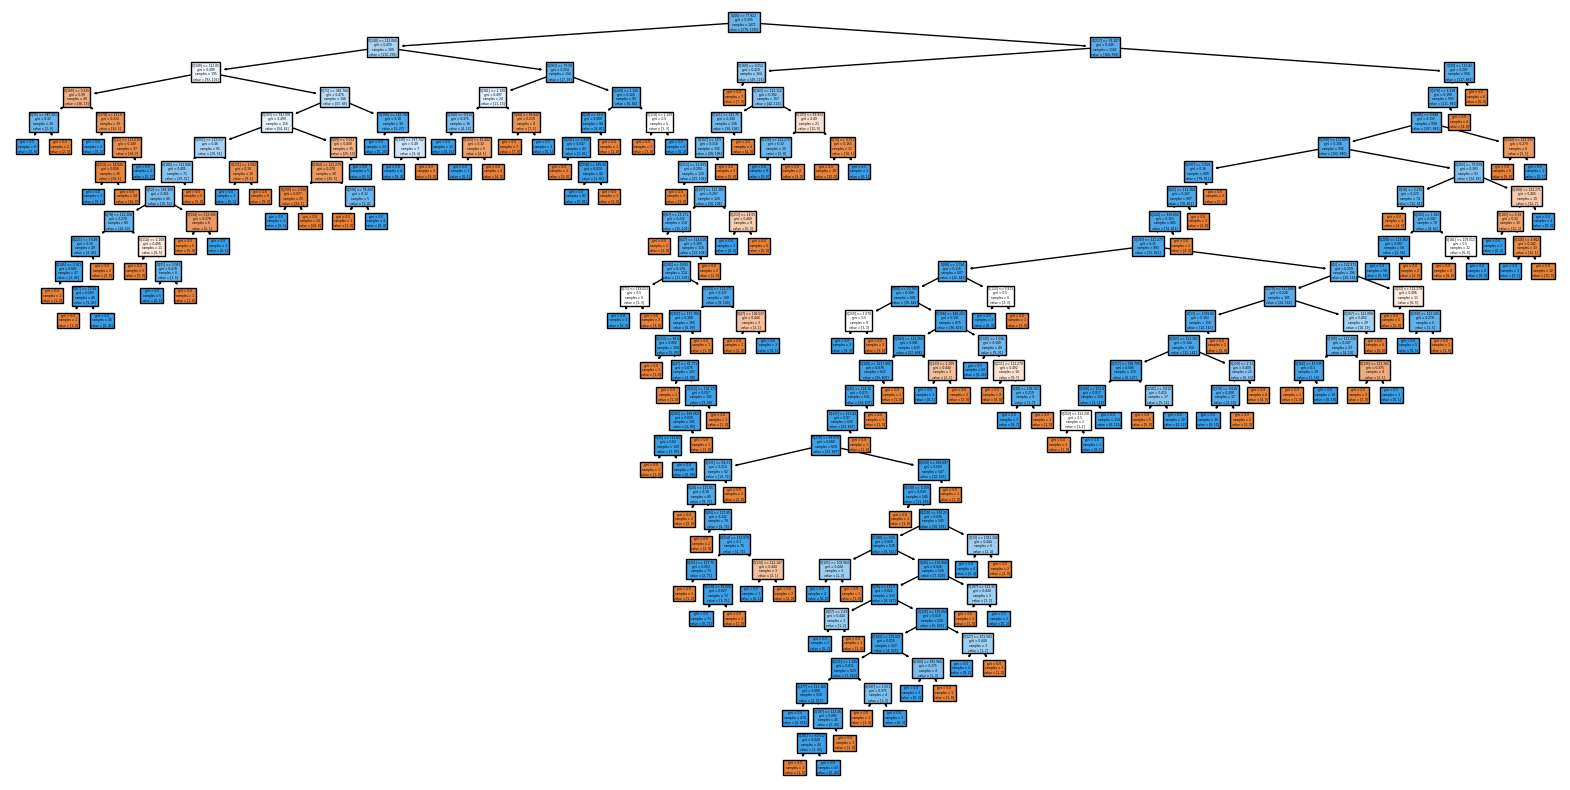

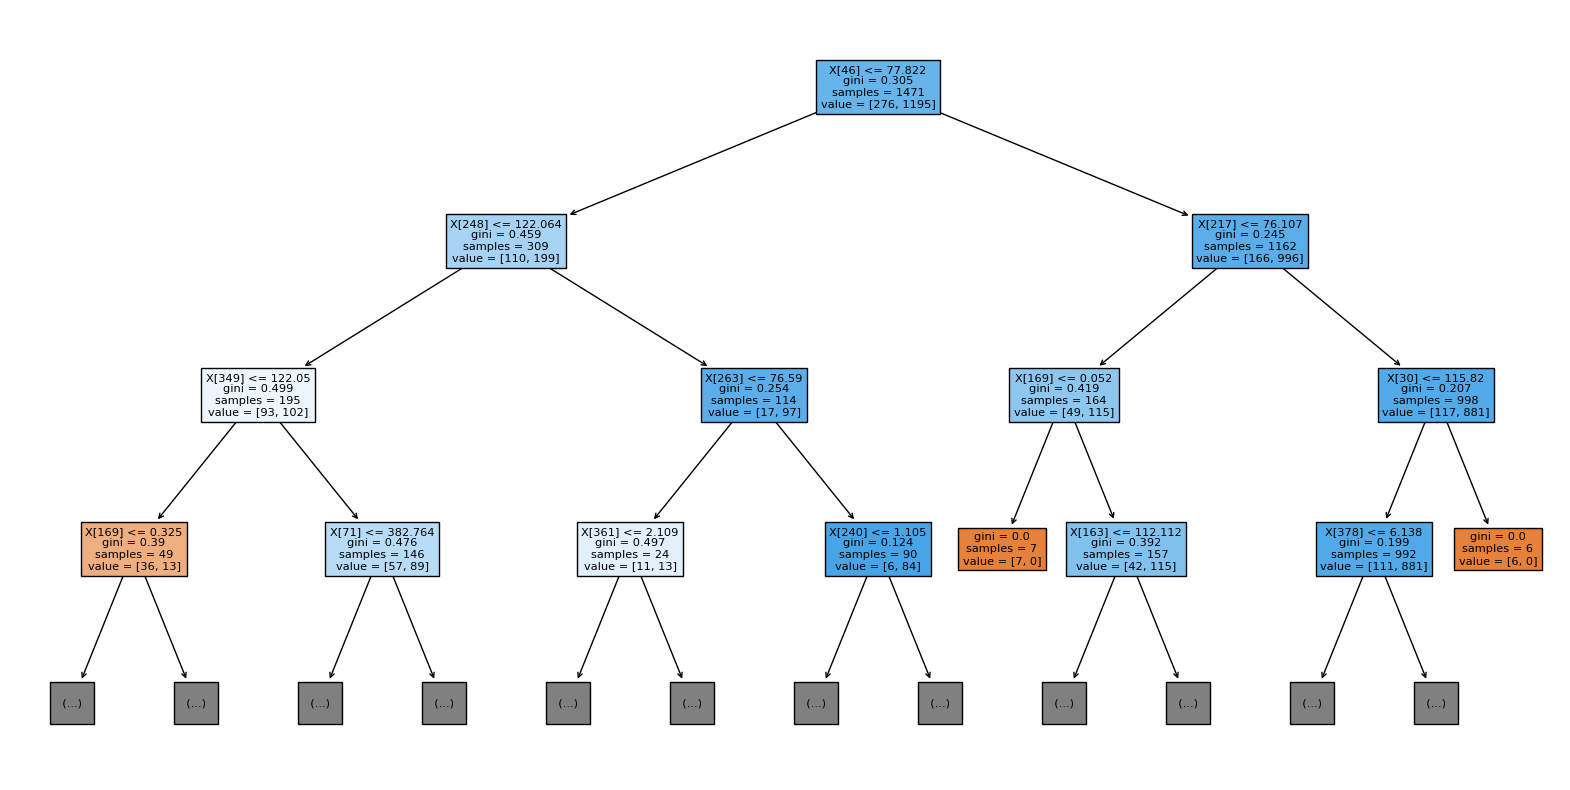

In [15]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Visualize the decision tree
plt.figure(figsize=(20,10))  # Set the figure size
plot_tree(clf, filled=True)
plt.show()

# zoom in to the first 3 levels
plt.figure(figsize=(20,10))  # Set the figure size
plot_tree(clf, filled=True, max_depth=3)
plt.show()


In [70]:
df.head()

,TP,TE1,TE2,TE3,TE4,Program Number,Min_ster_Temp,Max_ster_Temp,Overall Avg TE1,Overall Avg TE2,Overall Avg TE3,Overall Avg TE4,Overall Avg TP,Overall Var TE1,Overall Var TE2,Overall Var TE3,Overall Var TE4,Overall Var TP,Batch Status
0,2.110000,0.000000,122.100000,122.200000,122.100000,8,122.1,122.2,47.120690,114.396238,115.152978,114.968966,1.547931,2803.869759,131.966338,112.167656,115.738436,0.657171,0
1,2.109180,121.744262,121.963115,122.161475,122.013934,8,121.2,122.2,92.999427,112.804585,113.555301,113.648711,1.100487,874.492528,127.465898,114.342824,109.503023,0.728475,1
2,2.108934,121.779508,122.040164,122.269672,122.140164,3,121.2,122.4,90.738629,113.893458,114.797819,114.575701,1.074486,925.593441,86.884676,77.099151,81.663595,0.849215,1
3,2.109024,121.760163,121.968293,122.203252,122.082927,11,121.2,122.3,88.138739,113.450450,114.356156,114.064565,1.073874,967.878284,89.466001,81.164036,86.763680,0.824727,1
4,2.109754,121.595902,121.831148,122.027869,121.883607,10,121.2,122.1,92.804469,102.759497,102.860056,103.077933,1.959721,879.638523,473.956702,492.689689,450.135114,0.143143,1


In [71]:
# make a new dataframe with only overall variance for all temperature sensors and TP and print batch status with it
df2 = df[['Overall Var TE1','Overall Var TE2','Overall Var TE3','Overall Var TE4', 'Overall Var TP', 'Batch Status']]

In [72]:
points = []
okpt=[]
for i in range(len(df2) - 1):  # Iterate up to the second last row
    if df2.at[i, 'Overall Var TE1'] > 1100 and df2.at[i + 1, 'Batch Status'] == 0:
        points.append(i)

for i in range(len(df2) - 1):  # Iterate up to the second last row
    if df2.at[i, 'Overall Var TE1'] > 1100 and df2.at[i + 1, 'Batch Status'] == 1:
        okpt.append(i)

print("Points where Overall Var TE1 is greater than 1000 of row i and Batch Status of row i+1 is 0:")
for point in points:
    print(f"Row {point}: Overall Var TE1 = {df.at[point, 'Overall Var TE1']}")

# total number of such points
print(f"Total number of points: {len(points)}")
print(f"Total number of points: {len(okpt)}")

Points where Overall Var TE1 is greater than 1000 of row i and Batch Status of row i+1 is 0:
Row 13: Overall Var TE1 = 1205.6763925956632
Row 33: Overall Var TE1 = 1556.356098312545
Row 102: Overall Var TE1 = 1246.3361308129795
Row 114: Overall Var TE1 = 1204.4526704605894
Row 117: Overall Var TE1 = 1268.0354462704183
Row 125: Overall Var TE1 = 1110.3168448746242
Row 142: Overall Var TE1 = 1260.1458264360883
Row 156: Overall Var TE1 = 1103.5563720930231
Row 160: Overall Var TE1 = 1102.8011467110005
Row 193: Overall Var TE1 = 1135.6722208801682
Row 215: Overall Var TE1 = 1236.3690961429704
Row 218: Overall Var TE1 = 1179.757844167917
Row 224: Overall Var TE1 = 1145.2457393202967
Row 254: Overall Var TE1 = 1158.8250528063886
Row 267: Overall Var TE1 = 1152.5721269321705
Row 276: Overall Var TE1 = 1120.739641877328
Row 391: Overall Var TE1 = 1121.899514904119
Row 879: Overall Var TE1 = 1106.6254961525594
Total number of points: 18
Total number of points: 59


In [73]:
print(classification_report(y_test, y_pred_dt))
print(confusion_matrix(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.27      0.29      0.28        70
           1       0.83      0.82      0.83       299

    accuracy                           0.72       369
   macro avg       0.55      0.55      0.55       369
weighted avg       0.73      0.72      0.72       369

[[ 20  50]
 [ 53 246]]


In [17]:
print(classification_report(y_train, y_tt))
print(confusion_matrix(y_train, y_tt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       276
           1       1.00      1.00      1.00      1195

    accuracy                           1.00      1471
   macro avg       1.00      1.00      1.00      1471
weighted avg       1.00      1.00      1.00      1471

[[ 276    0]
 [   0 1195]]


In [74]:
# Initialize and train Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=20, random_state=0, criterion='gini', class_weight= {0: 1, 1: 5})
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_predrf = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_predrf)
print("Accuracy:", accuracy)
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_predrf)
print("Mean Squared Error:", mse)


Accuracy: 0.7452574525745257
Mean Squared Error: 0.25474254742547425


In [49]:
print(classification_report(y_test, y_predrf))
print(confusion_matrix(y_test, y_predrf))

              precision    recall  f1-score   support

           0       0.41      0.33      0.37        70
           1       0.85      0.89      0.87       299

    accuracy                           0.78       369
   macro avg       0.63      0.61      0.62       369
weighted avg       0.77      0.78      0.77       369

[[ 23  47]
 [ 33 266]]


In [53]:
# in y_test how many are 0 and how many are 1
# count the number of 0s and 1s in y_test
unique, counts = np.unique(y_test, return_counts=True)
dict(zip(unique, counts))

{0: 70, 1: 299}

In [75]:
clf = LogisticRegression(max_iter=10000)  # Increase the number of iterations to 1000
clf.fit(X_train, y_train)

# Predict on the test set
y_pred_lr = clf.predict(X_test)
y_train_pred = clf.predict(X_train)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_lr)
print("Accuracy:", accuracy)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred_lr)
print("Mean Squared Error:", mse)
print(classification_report(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))

Accuracy: 0.7588075880758808
Mean Squared Error: 0.24119241192411925
              precision    recall  f1-score   support

           0       0.34      0.30      0.32        70
           1       0.84      0.87      0.85       299

    accuracy                           0.76       369
   macro avg       0.59      0.58      0.59       369
weighted avg       0.75      0.76      0.75       369

[[ 21  49]
 [ 40 259]]


c:\Users\91751\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [51]:

# Initialize lists to store evaluation metrics
thresholds = np.arange(0, 1.1, 0.1)
accuracies = []
mses = []
conf_matrices = []

clf = LogisticRegression(max_iter=10000)
clf.fit(X_train, y_train)

for threshold in thresholds:
    # Convert probabilities to binary predictions based on the threshold
    probs = clf.predict_proba(X_test)
    binary_preds = (probs[:, 1] > threshold).astype(int)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, binary_preds)
    accuracies.append(accuracy)

    # Calculate the mean squared error
    mse = mean_squared_error(y_test, binary_preds)
    mses.append(mse)

    # Calculate confusion matrix
    conf_matrix = confusion_matrix(y_test, binary_preds)
    conf_matrices.append(conf_matrix)

# Print evaluation metrics for each threshold

# Convert evaluation metrics lists to numpy arrays
accuracies_arr = np.array(accuracies)
mses_arr = np.array(mses)
conf_matrices_arr = np.array(conf_matrices)


c:\Users\91751\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [52]:
# Print the evaluation metrics as an array
print("Threshold | Accuracy | MSE")
print("-----------------------------------")
for i, threshold in enumerate(thresholds):
    acc = accuracies_arr[i]
    mse = mses_arr[i]

    print(f"{threshold:.1f}      | {acc:.4f}   | {mse:.4f}")

# Print confusion matrices separately
print("\nConfusion Matrices:")
print("-------------------------")
for i, threshold in enumerate(thresholds):
    print(f"\nThreshold: {threshold:.1f}")
    print("Confusion Matrix:")
    print(conf_matrices_arr[i])


Threshold | Accuracy | MSE
-----------------------------------
0.0      | 0.8103   | 0.1897
0.1      | 0.8103   | 0.1897
0.2      | 0.8103   | 0.1897
0.3      | 0.7913   | 0.2087
0.4      | 0.7832   | 0.2168
0.5      | 0.7724   | 0.2276
0.6      | 0.7507   | 0.2493
0.7      | 0.7182   | 0.2818
0.8      | 0.6721   | 0.3279
0.9      | 0.5881   | 0.4119
1.0      | 0.1897   | 0.8103

Confusion Matrices:
-------------------------

Threshold: 0.0
Confusion Matrix:
[[  0  70]
 [  0 299]]

Threshold: 0.1
Confusion Matrix:
[[ 12  58]
 [ 12 287]]

Threshold: 0.2
Confusion Matrix:
[[ 17  53]
 [ 17 282]]

Threshold: 0.3
Confusion Matrix:
[[ 20  50]
 [ 27 272]]

Threshold: 0.4
Confusion Matrix:
[[ 22  48]
 [ 32 267]]

Threshold: 0.5
Confusion Matrix:
[[ 24  46]
 [ 38 261]]

Threshold: 0.6
Confusion Matrix:
[[ 24  46]
 [ 46 253]]

Threshold: 0.7
Confusion Matrix:
[[ 25  45]
 [ 59 240]]

Threshold: 0.8
Confusion Matrix:
[[ 32  38]
 [ 83 216]]

Threshold: 0.9
Confusion Matrix:
[[ 37  33]
 [119 180]]



In [53]:

threshold = 1

# Calculate class weights to achieve the threshold
class_weight = {0: 1, 1 : 1/ threshold }

# Initialize and train Logistic Regression Classifier with increased iterations
clf = LogisticRegression(max_iter=10000, class_weight=class_weight)  # Increase the number of iterations to 10000
clf.fit(X_train, y_train)

# Predict on the test set
y_pred_lr = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_lr)
print("Accuracy:", accuracy)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred_lr)
print("Mean Squared Error:", mse)

# Display confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))

Accuracy: 0.7723577235772358
Mean Squared Error: 0.22764227642276422
Confusion Matrix:
[[ 24  46]
 [ 38 261]]


c:\Users\91751\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [54]:
from scipy.optimize import minimize

def objective_function(vars):
    r, C = vars
    x = 34.5707 + 0.0006*(r-45) + 0.2858*(C-265) + 0.0561*(r-45)*(C-265) + 0.0136*(C-265)**2 + 0.2127*(r-45)**2
    return x

initial_guess = [50, 250]  # Initial guess for r and C
result = minimize(objective_function, initial_guess, method='Nelder-Mead')

min_x = result.fun
min_r, min_C = result.x

print("Minimum value of the function:", min_x)
print("Corresponding r value:", min_r)
print("Corresponding C value:", min_C)


Minimum value of the function: 32.50935741465485
Corresponding r value: 46.901443791009
Corresponding C value: 250.57092358843968
